In [ ]:
#!pip install statsmodels

In [54]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

In [55]:
def pi(x):
    return np.e**(-abs(x[0]) - abs(x[1]) - abs(x[0]-x[1]))

### Random-Walk Metropolis

In [56]:
# define the proposal distribution
def q(x):
    '''
    Random proposition for the Metropolis-Hastings algorithm.
    Uses the multivariate normal distribution with mean x and covariance cov.
    '''
    cov = np.array([[1, 0], [0, 1]])
    return np.random.multivariate_normal(x, cov)

In [57]:
def random_walk_metropolis(N, x0, burn_in, thinning):
    x = x0
    chain = np.zeros([N, 2])

    counter_thin = 0
    sample_size = 0
    counter = 0
    accept = 0
    while sample_size < N:
        y = q(x)
        ratio = pi(y)/pi(x)

        a = np.min([1.,ratio])
        r = np.random.rand()
        if r < a:
            accept += 1
            x = y
        # this is responsible for gathering samples in harmony with the rules set by burnin/thinning
        if counter>burn_in and (counter_thin == thinning or sample_size == 0):
            counter_thin = 0
            chain[sample_size] = x
            sample_size+= 1
        counter_thin += 1
        counter += 1

    acceptance_rate = accept/counter
    return chain, acceptance_rate

### Define the parameters to start the simulation

In [58]:
burn_in = 1000
thinning = 5
num_samples = 2000
initial_point = np.array([7,2])
chain, acceptance_rate = random_walk_metropolis(num_samples, initial_point, burn_in, thinning)
sample_mean = np.mean(chain, axis = 0)
sample_std = np.std(chain, axis = 0)

print("The simulated mean for Random Walk Metropolis is: {}".format(np.around(sample_mean, decimals=2)))

print("The simulated standard deviation for Random Walk Metropolis is: {}".format(np.around(sample_std, decimals=2)))

print("Acceptance rate for Random Walk is: ", acceptance_rate)

The simulated mean for Random Walk Metropolis is: [0.05 0.05]
The simulated standard deviation for Random Walk Metropolis is: [0.87 0.91]
Acceptance rate for Random Walk is:  0.41793216331726835


### Independent Metropolis

In [59]:
def q_laplace_sample(x):
    b = 7
    return np.random.laplace(x, scale = b)

In [60]:
def q_laplace_pdf(x):
    b = 7
    return (1/b)*np.e**(-abs(x)/b)

In [61]:
def independent_metropolis(N, x0, burn_in, thinning):
    x = x0
    chain = np.zeros([N, 2])

    counter_thin = 0
    sample_size = 0
    counter = 0
    while sample_size < N:
        y1 = q_laplace_sample(x[0])
        y2 = q_laplace_sample(x[1])
        y = np.array([y1, y2])
        ratio = (pi(y)*q_laplace_pdf(x[0])*q_laplace_pdf(x[1]))/(pi(x)*q_laplace_pdf(y[0])*q_laplace_pdf(y[1]))
        a = np.min([1.,ratio])
        r = np.random.rand()
        if r < a:
            x = y
        # this is responsible for gathering samples in harmony with the rules set by burnin/thinning
        if counter>burn_in and (counter_thin == thinning or sample_size == 0):
            counter_thin = 0
            chain[sample_size] = x
            sample_size+= 1
        counter_thin += 1
        counter += 1

    return chain

In [62]:
burn_in = 1000
thinning = 10
num_samples = 4000
initial_point = np.array([7,2])
ind_chain = independent_metropolis(num_samples, initial_point, burn_in, thinning)
ind_sample_mean = np.mean(ind_chain, axis = 0)
ind_sample_std = np.std(ind_chain, axis = 0)

print("The simulated mean of Independent Metropolis is: {}".format(np.around(ind_sample_mean, decimals=2)))

print("The simulated standard deviation of Independent Metropolis is: {}".format(np.around(ind_sample_std, decimals=2)))

The simulated mean of Independent Metropolis is: [0.   0.02]
The simulated standard deviation of Independent Metropolis is: [1.   1.01]
Acceptance rate of Independent Metropolis is:  0.03647053083528493


### Why is Laplace a good choice?

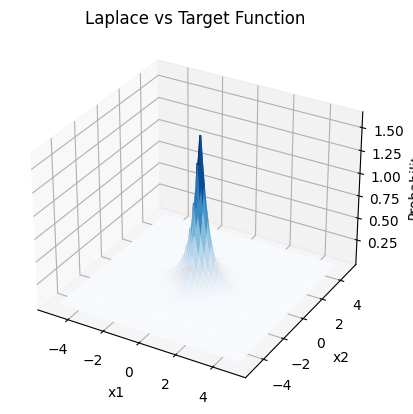

In [63]:
from mpl_toolkits.mplot3d import Axes3D

# Define the range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Define the parameters for the bivariate Laplace distribution
mu = [0, 0]  # location parameter
b = 0.5     # scale parameter

# Compute the values of the bivariate Laplace distribution
Z_laplace = np.exp(-np.abs(X - mu[0]) / b - np.abs(Y - mu[1]) / b) / (2 * b * b)

# Compute the values of the function e^(-abs(x1) - abs(x2) - abs(x1-x2))
Z_function = np.exp(-np.abs(X) - np.abs(Y) - np.abs(X - Y))

# Plot the bivariate Laplace distribution and the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_laplace, cmap='Blues', label='Bivariate Laplace')
ax.plot_surface(X, Y, Z_function, cmap='Reds', label='e^(-abs(x1) - abs(x2) - abs(x1-x2))')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability')
ax.set_title("Laplace vs Target Function")

plt.show()

### Random Walk Metropolis Trace Plot

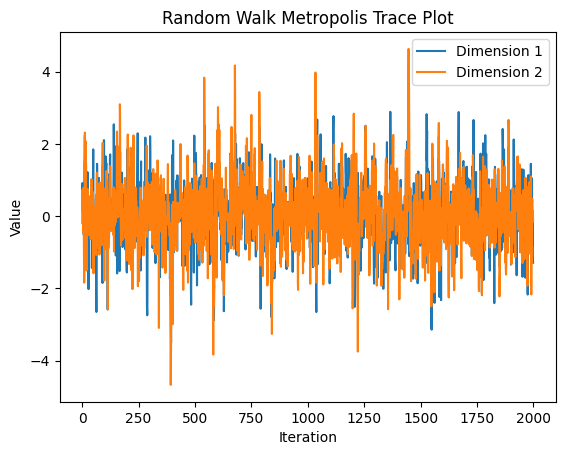

In [64]:
for i in range(chain.shape[1]):
    plt.plot(chain[:, i], label=f"Dimension {i+1}")

# Add labels and legend
plt.title("Random Walk Metropolis Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

# Show the plot
plt.show()

### Independent Metropolis Trace Plot

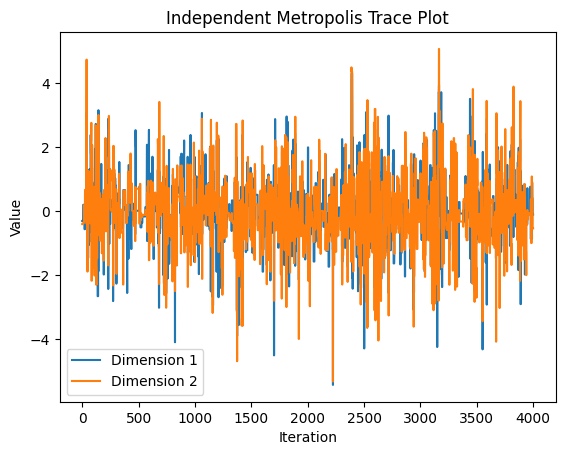

In [65]:
for i in range(ind_chain.shape[1]):
    plt.plot(ind_chain[:, i], label=f"Dimension {i+1}")

# Add labels and legend
plt.title("Independent Metropolis Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

# Show the plot
plt.show()

### Plot the covariance ellipsoid for Random Walk Metropolis

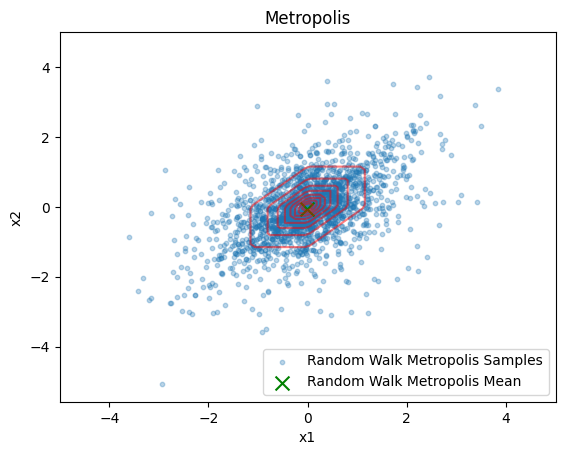

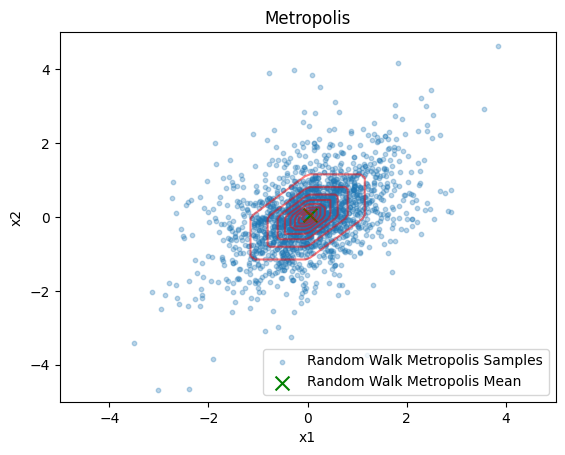

In [66]:
# Define the PDF function
def pdf(x1, x2):
    return np.exp(-np.abs(x1) - np.abs(x2) - np.abs(x1 - x2))

# Generate grid points for x1 and x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the PDF values for the grid points
Z = pdf(X1, X2)

# Plot the contour of the PDF
plt.contour(X1, X2, Z, levels=10, colors='r', alpha=0.5)

# Plot samples
plt.scatter(chain[:, 0], chain[:, 1], s=10, alpha=0.3, label='Random Walk Metropolis Samples')

# Plot mean
plt.scatter(sample_mean[0], sample_mean[1], s=100, marker='x', color='g', label='Random Walk Metropolis Mean')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metropolis')
plt.legend()

plt.show()

### Plot the covariance ellipsoid for Independent Metropolis

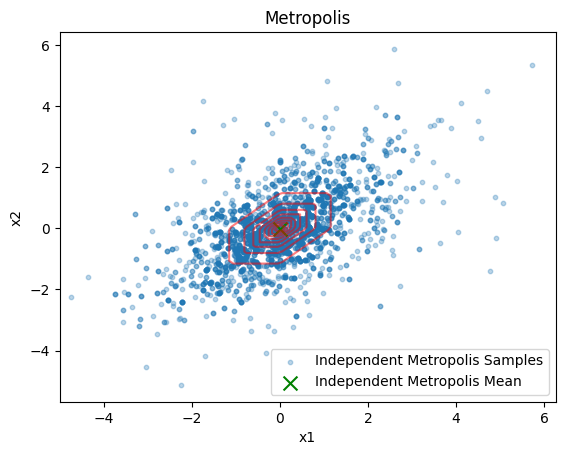

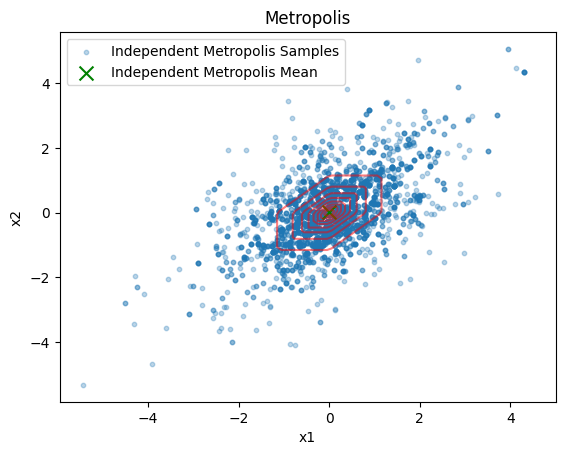

In [67]:
# Define the PDF function
def pdf(x1, x2):
    return np.exp(-np.abs(x1) - np.abs(x2) - np.abs(x1 - x2))

# Generate grid points for x1 and x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the PDF values for the grid points
Z = pdf(X1, X2)

# Plot the contour of the PDF
plt.contour(X1, X2, Z, levels=10, colors='r', alpha=0.5)

# Plot the samples
plt.scatter(ind_chain[:, 0], ind_chain[:, 1], s=10, alpha=0.3, label='Independent Metropolis Samples')

# Plot the mean
plt.scatter(ind_sample_mean[0], ind_sample_mean[1], s=100, marker='x', color='g', label='Independent Metropolis Mean')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metropolis')
plt.legend()

plt.show()

### Create a QQ-Plot comparing the 2 chains

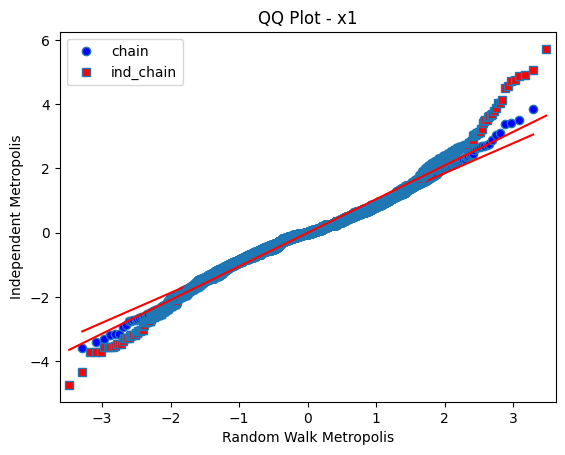

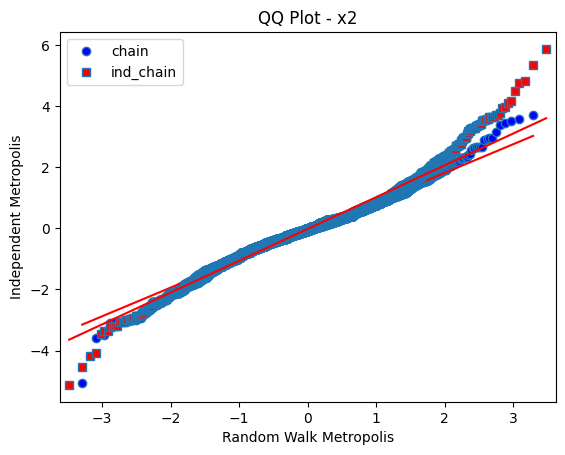

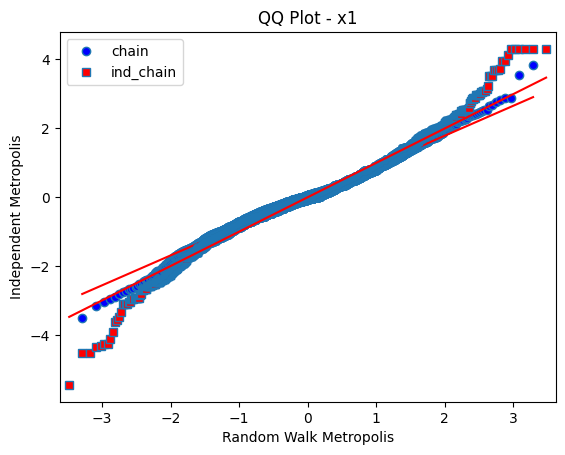

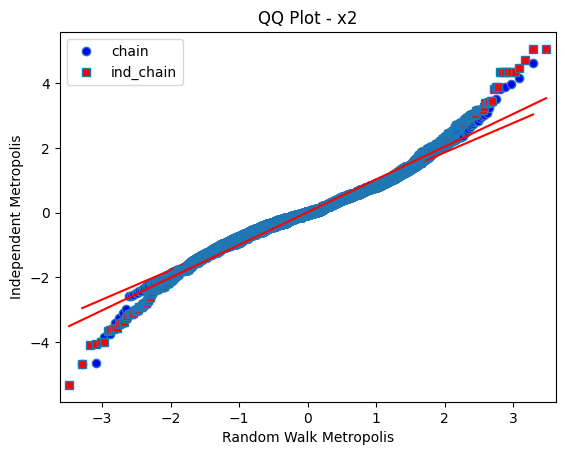

In [68]:
from statsmodels.graphics.gofplots import qqplot

# Select the first column of chain and ind_chain
chain_col1 = np.sort(chain[:, 0])
ind_chain_col1 = np.sort(ind_chain[:, 0])

# Create QQ plot for the first column with custom colors
fig, ax = plt.subplots()
qqplot(chain_col1, line='s', ax=ax, marker='o', markerfacecolor='blue', markersize=6, label='chain')
qqplot(ind_chain_col1, line='s', ax=ax, marker='s', markerfacecolor='red', markersize=6, label='ind_chain')
ax.set_title('QQ Plot - x1')
ax.set_xlabel('Random Walk Metropolis')
ax.set_ylabel('Independent Metropolis')
ax.legend()
plt.show()

# Select the second column of chain and ind_chain
chain_col2 = chain[:, 1]
ind_chain_col2 = ind_chain[:, 1]

# Create QQ plot for the second column with custom colors
fig, ax = plt.subplots()
qqplot(chain_col2, line='s', ax=ax, marker='o', markerfacecolor='blue', markersize=6, label='chain')
qqplot(ind_chain_col2, line='s', ax=ax, marker='s', markerfacecolor='red', markersize=6, label='ind_chain')
ax.set_title('QQ Plot - x2')
ax.set_xlabel('Random Walk Metropolis')
ax.set_ylabel('Independent Metropolis')
ax.legend()
plt.show()

### Effective Sample Size for Random Walk Metropolis

In [69]:
#import tensorflow_probability as tfp
#import tensorflow as tf

#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#ess = tfp.mcmc.effective_sample_size(chain)[0]

#print(int(ess.numpy()))

# 636

752
683


### Effective Sample Size for Independent Metropolis

In [70]:
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#ess = tfp.mcmc.effective_sample_size(ind_chain)[0]

#print(int(ess.numpy()))

# 937

1011
850
